# CARTOPY PROJECTIONS

In [1]:
from netCDF4 import Dataset
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt

# WOCE/ (Argo) Global Hydrographic Climatology
https://icdc.cen.uni-hamburg.de/1/daten/ocean/woce-climatology.html

In [2]:

url = r'http://icdc.cen.uni-hamburg.de/thredds/dodsC/ftpthredds/woce/wghc_params.nc'
# url = r'http://icdc.cen.uni-hamburg.de/thredds/dodsC/ftpthredds/waghc/WAGHC_PYC_01_UHAM-ICDC_v1_0.nc'

woce = Dataset(url)
woce.variables.keys()

odict_keys(['LON', 'LAT', 'ZAX', 'BOT_DEP', 'PRES', 'TEMP', 'TPOTEN', 'SALINITY', 'OXYGEN', 'SILICATE', 'NITRATE', 'PHOSPH', 'GAMMAN', 'SIG0', 'SIG2', 'SIG4'])

https://stackoverflow.com/questions/47431242/matplotlib-create-lat-lon-white-black-round-bounding-box-around-basemap
http://menugget.blogspot.com/2012/04/add-frame-to-map.html
https://www.leouieda.com/blog/gmt-after-scipy2017.html

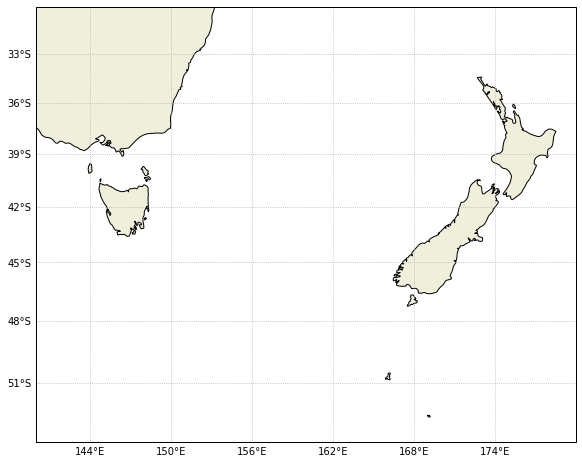

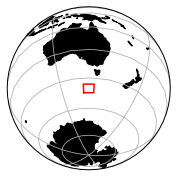

In [3]:
%matplotlib inline

# ax = plt.axes(projection=ccrs.Mercator())
# ax.coastlines()

# projection = ccrs.PlateCarree() ccrs.Mercator() ccrs.AlbersEqualArea()
projection = ccrs.Mercator()
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=projection)
# ax.set_xticks(np.linspace(140, 180, 5), crs=projection)
# ax.set_yticks(np.linspace(-50, -30, 5), crs=projection)
ax.set_extent([140, 180, -52, -30])
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
land = cfeature.NaturalEarthFeature(
    category='physical', 
    name='coastline', 
    scale='50m',
    edgecolor='black',
    facecolor=(240/256, 240/256, 220/256))
ax.add_feature(land)
# ax.gridlines(linestyle=':')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle=':')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.show()

plt.figure(figsize=(3, 3))
crs = ccrs.NearsidePerspective(satellite_height=12000000.0, central_longitude=141, central_latitude=-50.1)
ax = plt.axes(projection=crs)
ax.set_global()
# ax.coastlines(resolution='110m')

land = cfeature.NaturalEarthFeature(
    category='physical', 
    name='coastline', 
    scale='110m',
    edgecolor='black',
    facecolor='black')
ax.add_feature(land)

ax.gridlines()
# ax.set_extent([80, 200, -110, -10], crs=ccrs.PlateCarree())

# ax.scatter(150, -51, s=100, transform=crs)
ax.plot([137, 145, 145, 137, 137], [-52.2, -52.2, -48, -48, -52.2], transform=ccrs.PlateCarree(), color='r')


plt.show()


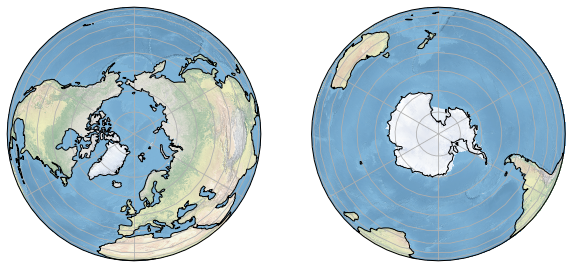

In [4]:
fig = plt.figure(figsize=[10, 5])

# We choose to plot in an Orthographic projection as it looks natural
# and the distortion is relatively small around the poles where
# the aurora is most likely.

# ax1 for Northern Hemisphere
ax1 = plt.subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))

# ax2 for Southern Hemisphere
ax2 = plt.subplot(1, 2, 2, projection=ccrs.Orthographic(180, -90))

#     img, crs, extent, origin, dt = aurora_forecast()

for ax in [ax1, ax2]:
    ax.coastlines(zorder=3)
    ax.stock_img()
    ax.gridlines()

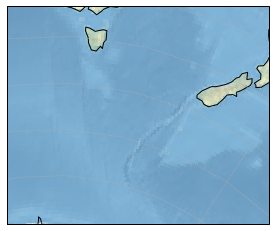

In [5]:
# An arbitrary choice.
canada_east = 132
canada_west = 175
canada_north = -38
canada_south = -62

standard_parallels = (-50, -60)
central_longitude = 139

fig = plt.figure()
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=central_longitude, standard_parallels=standard_parallels))
ax.set_extent([canada_west, canada_east, canada_south, canada_north])
ax.stock_img()
ax.coastlines()
gl = ax.gridlines(linestyle=':')


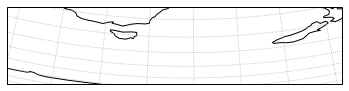

In [6]:
plt.figure()
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_longitude=155,central_latitude=-50))
ax.set_extent([132, 175, -62, -38])
ax.coastlines()
gl = ax.gridlines(linestyle=':', crs=ccrs.PlateCarree())

# Make map
https://scitools.org.uk/cartopy/docs/latest/gallery/effects_of_the_ellipse.html#sphx-glr-gallery-effects-of-the-ellipse-py

NameError: name 'lonlon' is not defined

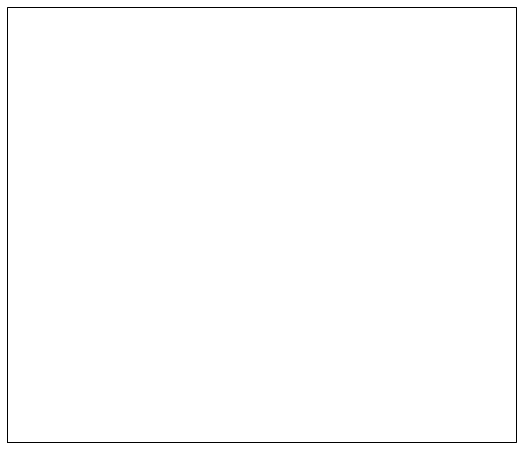

In [7]:
projection = ccrs.Mercator()
transform = ccrs.PlateCarree()
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=projection)
pcol = ax.contourf(lonlon, latlat, -np.ma.masked_invalid(elev), np.linspace(0, 5500, 12), 
                   cmap=cmo.cm.deep, transform=transform, zorder=0)
plt.colorbar(pcol)

ax.plot(ctd['lon'][2:,1], ctd['lat'][2:,1], color='k', transform=transform, zorder=1)
ax.scatter(ctd['lon'][2:,1], ctd['lat'][2:,1], edgecolor='k', facecolor='w', transform=transform, zorder=2)

colors = ('yellow', 'm', 'green')
for i in range(weekmeanadt.shape[0]):
    ct = ax.contour(SSH.longitude, SSH.latitude, weekmeanadt[i], levels=[0, 0.15, 0.3], 
                    transform=transform, colors=colors, linewidths=1, zorder=2)

ct = ax.contour(SSH.longitude, SSH.latitude, voyagemeanadt, levels=[0, 0.15, 0.3], 
                transform=transform, colors='k', zorder=2, linewidths=3)
ax.clabel(ct, inline=1, fontsize=10, fmt='%.2f', linewidth=3)

ax.set_extent([137, 147, -48, -52.4])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle=':')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

crs = ccrs.NearsidePerspective(satellite_height=12000000.0, central_longitude=141, central_latitude=-50.1)
sub_ax = fig.add_axes([0.6, 0.68, 0.17, 0.3], projection=crs)
sub_ax.set_global()

land = cfeature.NaturalEarthFeature(
    category='physical', 
    name='coastline', 
    scale='110m',
    edgecolor='black',
    facecolor='black')
sub_ax.add_feature(land)

sub_ax.gridlines(linestyle=':')
sub_ax.plot([137, 147, 147, 137, 137], [-52.4, -52.4, -48, -48, -52.4], transform=ccrs.PlateCarree(), color='r')

plt.show()
